<a href="https://colab.research.google.com/github/stephaniknupp/C-SharpStudyPrograms/blob/master/Copy_of_Workshop_SC_An%C3%A1lise_de_Sentimentos_In%C3%ADcio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stage 1: Importando dependências e testando a acurácia do nosso modelo

# New Section

Importando o nosso Dataset:

- Baixe o arquivo no seguinte link: 
- Após baixar, dentro do colab clique na setinha no canto superior esquerdo (>) e aba o menu lateral
- No menu lateral, abra a aba Files (não é a aba File no menu superior da tela!!)
- Clique em Upload e insira o arquivo baixado

In [0]:
import pandas as pd
resenha = pd.read_csv('imdb_pt_updated.csv')
resenha.head()

,text_pt,sentiment,classificacao
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [0]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)
    regressao_logistica = LogisticRegression(solver = "lbfgs")
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)
print(classificar_texto(resenha, "text_pt", "classificacao"))

0.6664


In [0]:
%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [0]:
def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query("sentiment == 'neg'")
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])

    nuvem_palvras = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palvras, interpolation='bilinear')
    plt.axis("off")
    plt.show()


In [0]:
def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query("sentiment == 'pos'")
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])

    nuvem_palvras = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palvras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

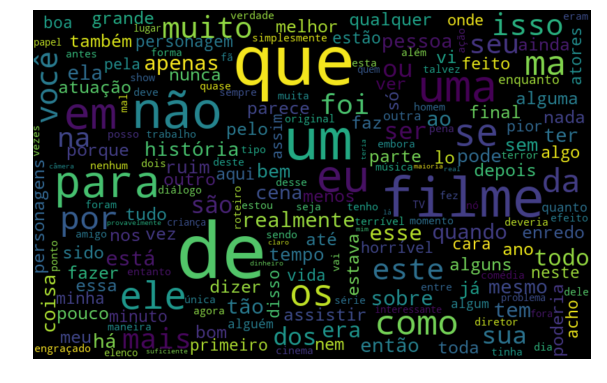

In [0]:
nuvem_palavras_neg(resenha, "text_pt")

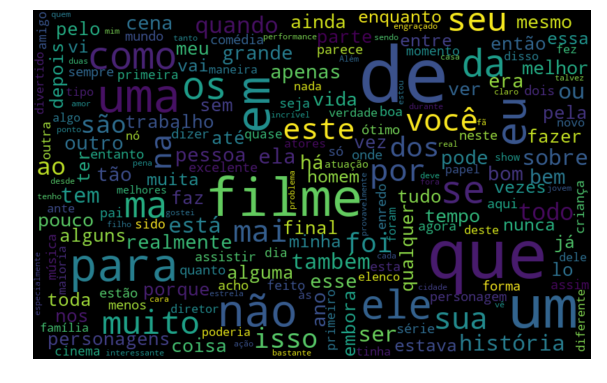

In [10]:
nuvem_palavras_pos(resenha, "text_pt")

In [11]:
from nltk import tokenize
import nltk

todas_palavras = ' '.join([texto for texto in resenha.text_pt])
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()), "Frequencia": list(frequencia.values())})
df_frequencia.nlargest(columns = "Frequencia", n = 10)

,Palavra,Frequencia
20,de,42441
14,que,32915
42,e,30045
3,o,24939
7,um,22420
102,a,21160
45,é,19511
200,em,13402
1,uma,13314
29,não,13003


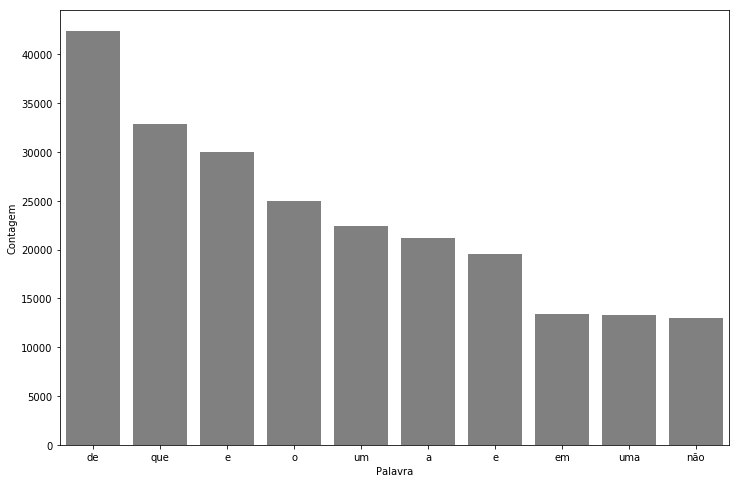

In [12]:
import seaborn as sns
from nltk import tokenize
import nltk
    
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()



pareto(resenha, "text_pt", 10)

In [20]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

frase_processada = list()
for opiniao in resenha.text_pt:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_1"] = frase_processada

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
resenha.head()

,text_pt,sentiment,classificacao,tratamento_1
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [22]:
classificar_texto(resenha, "tratamento_1", "classificacao")

0.6808

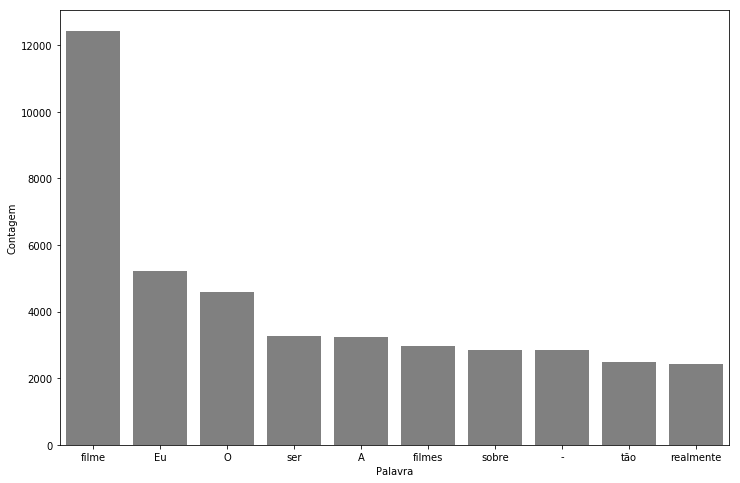

In [23]:
pareto(resenha,"tratamento_1", 10)

In [0]:
frase_processada = list()
for opiniao in resenha["tratamento_1"]:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_2"] = frase_processada

In [26]:
resenha

,text_pt,sentiment,classificacao,tratamento_1,tratamento_2
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...","vez, sr. costner arrumou filme tempo necessári..."
1,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,exemplo motivo maioria filmes ação mesmos. gen...
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...","primeiro tudo odeio raps imbecis, poderiam agi..."
3,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,beatles puderam escrever músicas todos gostass...
4,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...","filmes fotos latão palavra apropriada eles, ve..."
5,Uma coisa engraçada aconteceu comigo enquanto ...,neg,0,Uma coisa engraçada aconteceu comigo enquanto ...,coisa engraçada aconteceu comigo enquanto assi...
6,Este filme de terror alemão tem que ser um dos...,neg,0,Este filme terror alemão ser estranhos vi. Eu ...,filme terror alemão ser estranhos vi. ciente q...
7,"Sendo um fã de longa data do cinema japonês, e...",neg,0,"Sendo fã longa data cinema japonês, esperava i...","sendo fã longa data cinema japonês, esperava i..."
8,"""Tokyo Eyes"" fala de uma menina japonesa de 17...",neg,0,"""Tokyo Eyes"" fala menina japonesa 17 anos cai ...","""tokyo eyes"" fala menina japonesa 17 anos cai ..."
9,Fazendeiros ricos em Buenos Aires têm uma long...,neg,0,Fazendeiros ricos Buenos Aires têm longa polít...,fazendeiros ricos buenos aires têm longa polít...


In [27]:
acuracia_tratamento_2 = classificar_texto(resenha, "tratamento_2", "classificacao")
acuracia_tratamento_2

0.664

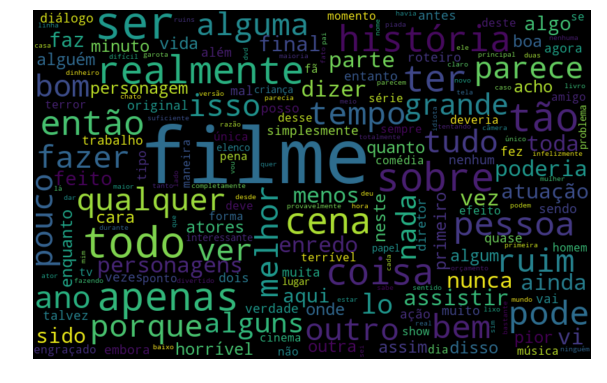

In [28]:
nuvem_palavras_neg(resenha, "tratamento_2")

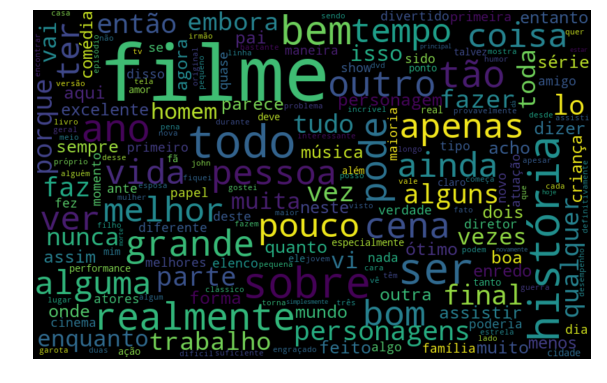

In [29]:
nuvem_palavras_pos(resenha, "tratamento_2")

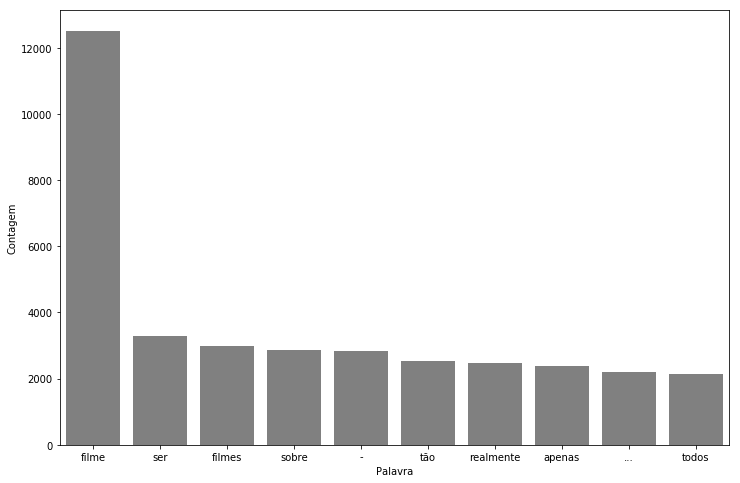

In [30]:
pareto(resenha, "tratamento_2", 10)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(resenha["tratamento_2"])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              resenha["classificacao"],
                                                              random_state = 42)

regressao_logistica = LogisticRegression(solver = "lbfgs")
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_ngrams)

0.8864


In [32]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index = tfidf.get_feature_names()
)

pesos.nlargest(50,0)

,0
ótimo,2.407327
excelente,2.134050
incrível,1.521166
divertido,1.486812
gostei,1.336240
especialmente,1.311511
bom,1.298489
mundo,1.241016
trabalho,1.172442
bem,1.138660


In [33]:
pesos.nsmallest(50,0)

,0
ruim,-3.770557
horrível,-3.168847
pior,-2.842490
terrível,-2.339036
nada,-2.095996
minutos,-1.799289
mal,-1.777473
nenhum,-1.585256
coisa,-1.559160
piores,-1.496507


Importe o Pandas para converter o seu CSV em um dataframe!!

Importe as suas bibliotecas de treinamento

- CountVectorizer: Transforma o seu documento de texto em uma matriz de tokens
- train_test_split: Responsável por separar as massas de treinamento e teste
- LogisticRegression: Determina a acurácia do seu modelo com base em um modelo de predição determinado pelas massas de treinamento e teste